In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from google.colab import drive

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Internship/OASISINFOBYTE/Task-5 Sales Prediction Using Python/Advertising.csv')

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.size

1000

In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
df['TV'].mean()

147.0425

In [ ]:
df['TV'].fillna(df['TV'].mean(), inplace=True)

In [ ]:
df['TV'].mode()

0     17.2
1     76.4
2    109.8
3    177.0
4    184.9
5    197.6
6    199.8
7    222.4
8    237.4
9    240.1
Name: TV, dtype: float64

In [ ]:
mode_of_TV = df.pivot_table(values='TV', columns='Sales', aggfunc=(lambda x: x.mode()[0]))
mode_of_TV

Sales,1.6,3.2,4.8,5.3,5.5,5.6,5.7,5.9,6.6,6.7,...,23.2,23.7,23.8,24.2,24.4,24.7,25.4,25.5,26.2,27.0
TV,0.7,4.1,8.6,5.4,7.3,13.2,8.4,17.2,7.8,18.7,...,239.9,198.9,210.8,261.3,281.4,220.3,243.2,283.6,287.6,276.9


In [ ]:
miss_values=df['TV'].isnull()
miss_values

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: TV, Length: 200, dtype: bool

In [ ]:
df.loc[miss_values,'TV']=df.loc[miss_values,'Sales'].apply(lambda x:mode_of_TV[x])

In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
sns.set()

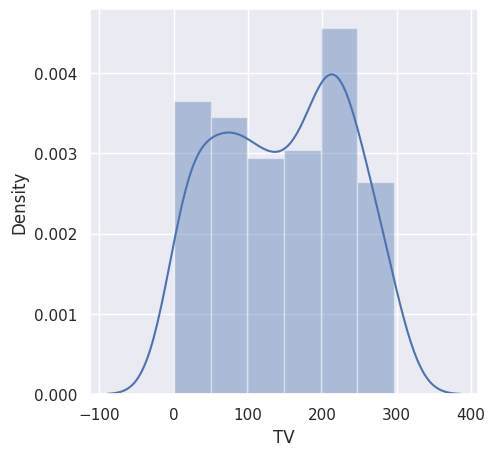

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df['TV'])
plt.show()

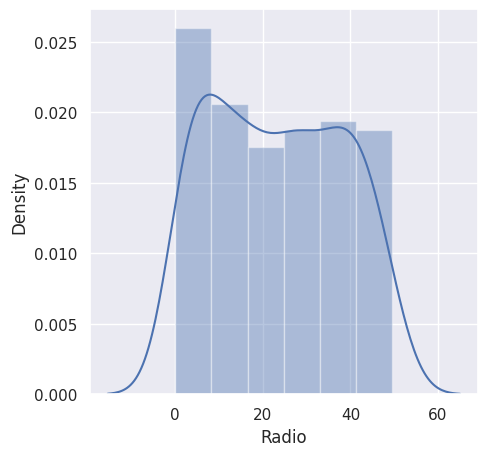

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df['Radio'])
plt.show()

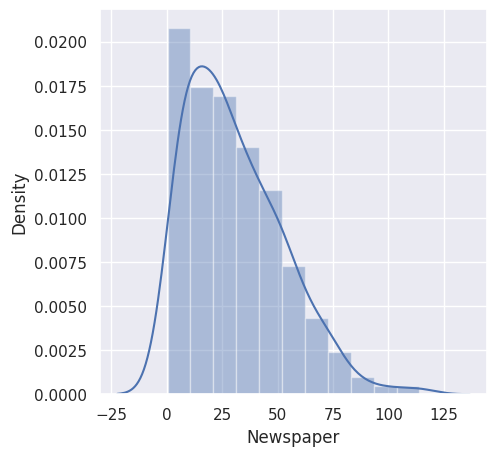

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df['Newspaper'])
plt.show()

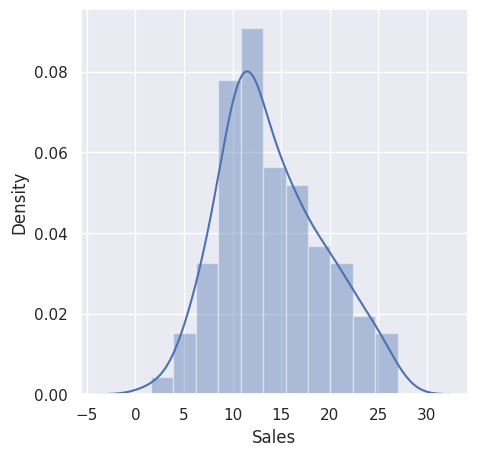

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df['Sales'])
plt.show()

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df['Newspaper'].value_counts()

9.3     3
25.6    3
8.7     3
34.6    2
8.5     2
       ..
27.2    1
31.7    1
19.3    1
31.3    1
66.2    1
Name: Newspaper, Length: 172, dtype: int64

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['TV'] = encoder.fit_transform(df['TV'])
df['Radio'] = encoder.fit_transform(df['Radio'])
df['Newspaper'] = encoder.fit_transform(df['Newspaper'])
df['Sales'] = encoder.fit_transform(df['Sales'])

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,153,131,159,106
1,2,32,136,124,31
2,3,12,156,160,23
3,4,98,142,149,89
4,5,112,41,148,54


In [ ]:
X = df.drop(columns='Radio', axis=1)
Y = df['Radio']

In [ ]:
X

,Unnamed: 0,TV,Newspaper,Sales
0,1,153,159,106
1,2,32,124,31
2,3,12,160,23
3,4,98,149,89
4,5,112,148,54
...,...,...,...,...
195,196,28,44,14
196,197,63,23,27
197,198,111,20,53
198,199,181,158,118


In [ ]:
Y

0      131
1      136
2      156
3      142
4       41
      ... 
195     18
196     21
197     35
198    145
199     34
Name: Radio, Length: 200, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(200, 1)
(160, 1)
(40, 1)


In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print("Accuracy: ",model.score(X_test,Y_test))

Accuracy:  -0.01226783972849832


In [ ]:
model=DecisionTreeRegressor()
model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
print("Accuracy: ",model.score(X_test,Y_test))

Accuracy:  -1.0080115929868687


In [ ]:
model=RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
print("Accuracy: ",model.score(X_test,Y_test))

Accuracy:  -0.37774727401458463
